<a href="https://colab.research.google.com/github/HasibAlMuzdadid/Machine-Learning-and-Deep-Learning-Projects/blob/main/football%20kicking%20position%20finder%20%5Bwith%20regularization%5D/football_kicking_position_finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Football kicking position finder**

French Football Corporation would like to recommend positions where France's goal keeper should kick the ball so that the French team's players can then hit it with their head. 



The following 2D dataset from France's past 10 games is provided.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import sklearn
import sklearn.datasets
import scipy.io

In [ ]:
def load_2D_dataset():
    data = scipy.io.loadmat("data.mat")
    train_X = data['X'].T
    train_Y = data['y'].T
    test_X = data['Xval'].T
    test_Y = data['yval'].T

    plt.scatter(train_X[0, :], train_X[1, :], c=train_Y, s=40, cmap=plt.cm.Spectral);
    
    return train_X, train_Y, test_X, test_Y

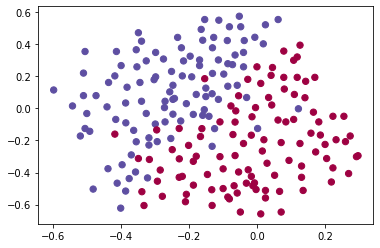

In [ ]:
# load dataset
train_X, train_Y, test_X, test_Y = load_2D_dataset()

Each dot corresponds to a position on the football field where a football player has hit the ball with his/her head after the French goal keeper has shot the ball from the left side of the football field.
- If the dot is blue, it means the French player managed to hit the ball with his/her head
- If the dot is red, it means the other team's player hit the ball with their head

**Our goal :** Using a deep learning model to find the positions on the field where the goalkeeper should kick the ball.

**Analysis of the dataset :** This dataset is a little noisy, but it looks like a diagonal line separating the upper left half (blue) from the lower right half (red) would work well. 



In [ ]:
# helper function
def sigmoid(x):
  s = 1/(1+np.exp(-x))
  return s

def relu(x):
  s = np.maximum(0,x)  
  return s

In [ ]:
def initialize_parameters(layer_dims):

  parameters = {}
  L = len(layer_dims)       # number of layers in the network

  for l in range(1, L):

    parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1])
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
  return parameters


In [ ]:
def forward_propagation(X, parameters):
   
  # retrieve parameters
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]
  W3 = parameters["W3"]
  b3 = parameters["b3"]
    
  # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
  Z1 = np.dot(W1, X) + b1
  A1 = relu(Z1)
  Z2 = np.dot(W2, A1) + b2
  A2 = relu(Z2)
  Z3 = np.dot(W3, A2) + b3
  A3 = sigmoid(Z3)
    
  cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    
  return A3, cache

In [ ]:
def compute_cost(a3, Y):
    
  m = Y.shape[1]
    
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
  cost = 1./m * np.nansum(logprobs)
    
  return cost

In [ ]:
def backward_propagation(X, Y, cache):
  
  m = X.shape[1]
  (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
  dZ3 = A3 - Y
  dW3 = 1./m * np.dot(dZ3, A2.T)
  db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
  dA2 = np.dot(W3.T, dZ3)
  dZ2 = np.multiply(dA2, np.int64(A2 > 0))
  dW2 = 1./m * np.dot(dZ2, A1.T)
  db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
  dA1 = np.dot(W2.T, dZ2)
  dZ1 = np.multiply(dA1, np.int64(A1 > 0))
  dW1 = 1./m * np.dot(dZ1, X.T)
  db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
  gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
               "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
               "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
  return gradients

In [ ]:
def update_parameters(parameters, grads, learning_rate):
      
  n = len(parameters) // 2 # number of layers in the neural networks

  # Update rule for each parameter
  for k in range(n):
    
    parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - learning_rate * grads["dW" + str(k+1)]
    parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - learning_rate * grads["db" + str(k+1)]
        
  return parameters


In [ ]:
def predict(X, y, parameters):
      
  m = X.shape[1]
  p = np.zeros((1,m), dtype = np.int)
    
  # Forward propagation
  a3, caches = forward_propagation(X, parameters)
    
  # convert probas to 0/1 predictions
  for i in range(0, a3.shape[1]):

    if a3[0,i] > 0.5:
      p[0,i] = 1
    else:
      p[0,i] = 0

  # print results

  #print ("predictions: " + str(p[0,:]))
  #print ("true labels: " + str(y[0,:]))
  print("Accuracy: "  + str(np.mean((p[0,:] == y[0,:]))))
    
  return p

In [ ]:
def predict_dec(parameters, X):
    
  # Predict using forward propagation and a classification threshold of 0.5
  a3, cache = forward_propagation(X, parameters)
  predictions = (a3>0.5)
  
  return predictions

In [ ]:
def plot_decision_boundary(model, X, y):

  # Set min and max values and give it some padding
  x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
  y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
  h = 0.01
  
  # Generate a grid of points with distance h between them
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  
  # Predict the function value for the whole grid
  Z = model(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  
  # Plot the contour and training examples
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
  plt.ylabel('x2')
  plt.xlabel('x1')
  plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
  plt.show()

In [ ]:
def model(X, Y, learning_rate, num_iterations, print_cost, lambd, keep_prob):
   
  grads = {}
  costs = []                            # to keep track of the cost
  m = X.shape[1]                        # number of examples
  layers_dims = [X.shape[0], 20, 3, 1]
    
  # Initialize parameters dictionary.
  parameters = initialize_parameters(layers_dims)

  # Loop (gradient descent)

  for i in range(0, num_iterations):

    # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
    if keep_prob == 1:
      a3, cache = forward_propagation(X, parameters)
    elif keep_prob < 1:
      a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)
        
    # Cost function
    if lambd == 0:
      cost = compute_cost(a3, Y)
    else:
      cost = compute_cost_with_regularization(a3, Y, parameters, lambd)
            
    # Backward propagation.
    if lambd == 0 and keep_prob == 1:
      grads = backward_propagation(X, Y, cache)
    elif lambd != 0:
      grads = backward_propagation_with_regularization(X, Y, cache, lambd)
    elif keep_prob < 1:
      grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
        
    # Update parameters.
    parameters = update_parameters(parameters, grads, learning_rate)
        
    # Print the loss every 10000 iterations
    if print_cost and i % 10000 == 0:
      print("Cost after iteration {}: {}".format(i, cost))
    if print_cost and i % 1000 == 0:
      costs.append(cost)
    
  # plot the cost
  plt.plot(costs)
  plt.ylabel('cost')
  plt.xlabel('iterations (x1,000)')
  plt.title("Learning rate =" + str(learning_rate))
  plt.show()
    
  return parameters

**Non Regularized Model**

Cost after iteration 0: 0.677453211527558
Cost after iteration 10000: 0.11503161340830324
Cost after iteration 20000: 0.12908599302099089


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


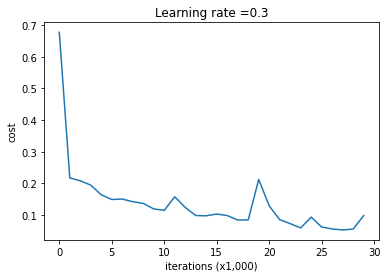

On the training set:
Accuracy: 0.976303317535545
On the test set:
Accuracy: 0.94


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [ ]:
parameters = model(train_X, train_Y, learning_rate = 0.3, num_iterations = 30000, print_cost = True, lambd = 0, keep_prob = 1)
print ("On the training set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

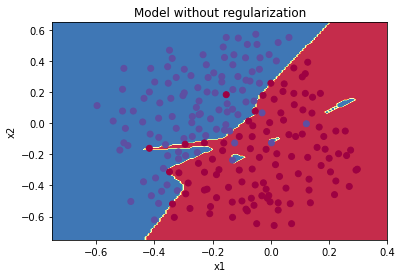

In [ ]:
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**L2 Regularized Model**

In [ ]:
def compute_cost_with_regularization(A3, Y, parameters, lambd):
   
  m = Y.shape[1]
  W1 = parameters["W1"]
  W2 = parameters["W2"]
  W3 = parameters["W3"]
    
  cross_entropy_cost = compute_cost(A3, Y)       # This gives the cross-entropy part of the cost
    
  L2_regularization_cost = 1/m * lambd / 2 * (np.sum(W1**2) + np.sum(W2**2) + np.sum(W3**2))
    
  cost = cross_entropy_cost + L2_regularization_cost
    
  return cost

In [ ]:
def backward_propagation_with_regularization(X, Y, cache, lambd):
   
  m = X.shape[1]
  (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
  dZ3 = A3 - Y
  
  dW3 = 1./m * np.dot(dZ3, A2.T) + lambd / m * W3
  db3 = 1./ m * np.sum(dZ3, axis=1, keepdims=True)
    
  dA2 = np.dot(W3.T, dZ3)
  dZ2 = np.multiply(dA2, np.int64(A2 > 0))
  dW2 = 1./m * np.dot(dZ2, A1.T) + lambd / m * W2
  db2 = 1. / m * np.sum(dZ2, axis=1, keepdims=True)
    
  dA1 = np.dot(W2.T, dZ2)
  dZ1 = np.multiply(dA1, np.int64(A1 > 0))
  dW1 = 1./m * np.dot(dZ1, X.T) + lambd / m * W1
    
  db1 = 1./ m * np.sum(dZ1, axis=1, keepdims=True)
    
  gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
               "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
               "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
  return gradients

Cost after iteration 0: 0.7354705277505276
Cost after iteration 10000: 0.26867371131583523
Cost after iteration 20000: 0.26863157496035645


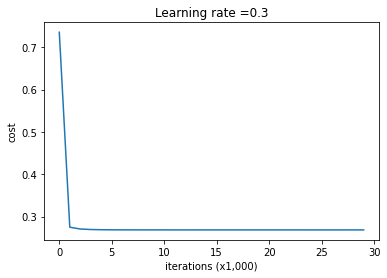

On the train set:
Accuracy: 0.9241706161137441
On the test set:
Accuracy: 0.93


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [ ]:
parameters = model(train_X, train_Y, learning_rate = 0.3, num_iterations = 30000, print_cost = True, lambd = 0.7, keep_prob = 1)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

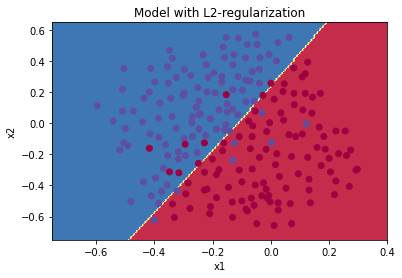

In [ ]:
plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Observations**:
- The value of $\lambda$ is a hyperparameter that we can tune using a dev set.
- L2 regularization makes the decision boundary smoother. If $\lambda$ is too large, it is also possible to "oversmooth", resulting in a model with high bias.

**What is L2-regularization actually doing?**:

L2-regularization relies on the assumption that a model with small weights is simpler than a model with large weights. Thus, by penalizing the square values of the weights in the cost function you drive all the weights to smaller values. It becomes too costly for the cost to have large weights! This leads to a smoother model in which the output changes more slowly as the input changes.

**Dropout Regularized Model**

In [ ]:
def forward_propagation_with_dropout(X, parameters, keep_prob ):
    
  # retrieve parameters
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]
  W3 = parameters["W3"]
  b3 = parameters["b3"]
    
  # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
  Z1 = np.dot(W1, X) + b1
  A1 = relu(Z1)
 
  D1 = np.random.rand(*A1.shape)                          # Step 1: initialize matrix D1 = np.random.rand(..., ...)
  D1 = D1 < keep_prob                                     # Step 2: convert entries of D1 to 0 or 1 (using keep_prob as the threshold)
  A1 = A1 * D1                                            # Step 3: shut down some neurons of A1
  A1 = A1 / keep_prob                                     # Step 4: scale the value of neurons that haven't been shut down
    
  Z2 = np.dot(W2, A1) + b2
  A2 = relu(Z2)
  
  D2 = np.random.rand(*A2.shape)                          # Step 1: initialize matrix D2 = np.random.rand(..., ...)
  D2 = D2 < keep_prob                                     # Step 2: convert entries of D2 to 0 or 1 (using keep_prob as the threshold)
  A2 = A2 * D2                                            # Step 3: shut down some neurons of A2
  A2 = A2 / keep_prob                                     # Step 4: scale the value of neurons that haven't been shut down
    
  Z3 = np.dot(W3, A2) + b3
  A3 = sigmoid(Z3)
    
  cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)
    
  return A3, cache

In [ ]:
def backward_propagation_with_dropout(X, Y, cache, keep_prob):
  
  m = X.shape[1]
  (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
  dZ3 = A3 - Y
  dW3 = 1./m * np.dot(dZ3, A2.T)
  db3 = 1./m * np.sum(dZ3, axis=1, keepdims=True)
  dA2 = np.dot(W3.T, dZ3)
  
  dA2 = dA2 * D2              # Step 1: Apply mask D2 to shut down the same neurons as during the forward propagation
  dA2 = dA2 / keep_prob       # Step 2: Scale the value of neurons that haven't been shut down
    
  dZ2 = np.multiply(dA2, np.int64(A2 > 0))
  dW2 = 1./m * np.dot(dZ2, A1.T)
  db2 = 1./m * np.sum(dZ2, axis=1, keepdims=True)
    
  dA1 = np.dot(W2.T, dZ2)
  
  dA1 = dA1 * D1              # Step 1: Apply mask D1 to shut down the same neurons as during the forward propagation
  dA1 = dA1 / keep_prob       # Step 2: Scale the value of neurons that haven't been shut down
    
  dZ1 = np.multiply(dA1, np.int64(A1 > 0))
  dW1 = 1./m * np.dot(dZ1, X.T)
  db1 = 1./m * np.sum(dZ1, axis=1, keepdims=True)
    
  gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
               "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
               "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
  return gradients

Cost after iteration 0: 0.7010785846835931


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


Cost after iteration 10000: 0.25719188308143753
Cost after iteration 20000: 0.19322526203244525


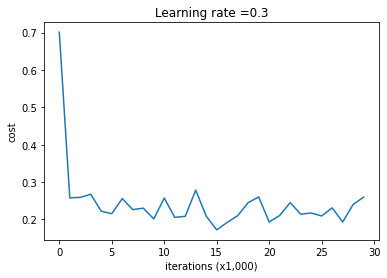

On the train set:
Accuracy: 0.95260663507109
On the test set:
Accuracy: 0.945


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [ ]:
parameters = model(train_X, train_Y, learning_rate = 0.3, num_iterations = 30000, print_cost = True, lambd = 0, keep_prob = 0.86)

print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

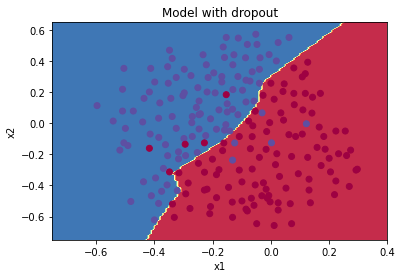

In [ ]:
plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Note**:

A **common mistake** when using dropout is to use it both in training and testing. It should be useed dropout (randomly eliminate nodes) only in training. 

**Conclusion:**

Here are the results of our three models:

<table> 
    <tr>
        <td>
        <b>model</b>
        </td>
        <td>
        <b>train accuracy</b>
        </td>
        <td>
        <b>test accuracy</b>
        </td>
    </tr>
        <td>
        3-layer Neural Network without regularization
        </td>
        <td>
        98%
        </td>
        <td>
        94%
        </td>
    <tr>
        <td>
        3-layer Neural Network with L2-regularization
        </td>
        <td>
        92%
        </td>
        <td>
        93%
        </td>
    </tr>
    <tr>
        <td>
        3-layer Neural Network with dropout
        </td>
        <td>
        95%
        </td>
        <td>
        94.5%
        </td>
    </tr>
</table> 